In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

In [133]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
    (rows, columns) = np.shape(x_train)
    for i in range(rows):
        if x_train[i][0] == 'no':
            x_train[i][0] = 0
        else:
            x_train[i][0] = 1

    for i in range(rows):
        if x_train[i][1] == 'F':
            x_train[i][1] = 0
        else:
            x_train[i][1] = 1
    return x_train

x_train = feature_changing(x_train)

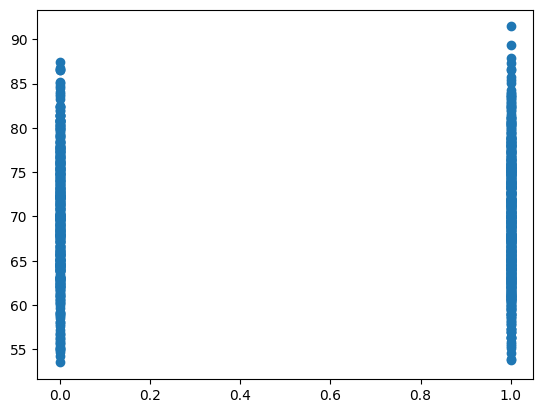

In [134]:
np.shape(x_train)
plt.scatter(x_train[:,1],y_train)

In [135]:
def z_score(x_train):

  x_mean = x_train.mean()
  x_std = x_train.std()

  x_train = (x_train - x_mean)/x_std

  return x_train,x_std,x_mean

In [136]:
def cost(x_train,y_train,w,b):

  m = len(y_train)

    # Calculate predictions
  predictions = np.dot(x_train, w) + b

  # Calculate mean squared error
  loss = (1 / (2 * m)) * np.sum((predictions - y_train) ** 2)

  return loss

In [137]:
def gradient_descent(x_train,y_train,w,b):
  iterations = 10
  learning_rate = 0.1
  
  m = len(y_train)
    
  for i in range(iterations):

      predictions = np.dot(x_train, w) + b
      
      dw = (1/m) * np.dot(x_train.T, (predictions - y_train))
      db = (1/m) * np.sum(predictions - y_train)
      
      w = w - learning_rate * dw
      b = b - learning_rate * db

  return w,b

In [138]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
